# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
import requests
from datetime import datetime
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=c35ab26509b363d4f5cd20b422d99205&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an error for bad responses

        # Parse the JSON and retrieve data
        data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]  # Humidity is found in the 'main' section
        city_clouds = data["clouds"]["all"]  # Cloudiness is found in the 'clouds' section
        city_wind = data["wind"]["speed"]  # Wind speed is found in the 'wind' section
        city_country = data["sys"]["country"]  # Country code is found in the 'sys' section
        city_date = datetime.fromtimestamp(data["dt"]).strftime('%Y-%m-%d %H:%M:%S')  # Format: YYYY-MM-DD HH:MM:SS

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}. Skipping...")
        pass
    except KeyError:
        print("City not found in the response. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | freetown
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | kenai
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | voi
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | tibanbang
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | suonenjoki
Processing Record 21 of Set 1 | bitche
Processing Record 22 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,3.05,93,100,2.57,CA,2024-11-03 18:00:51
1,wailua homesteads,22.0669,-159.3780,27.70,80,95,2.24,US,2024-11-03 18:00:52
2,port-aux-francais,-49.3500,70.2167,4.82,87,55,12.96,TF,2024-11-03 18:00:53
3,ushuaia,-54.8000,-68.3000,6.81,81,0,2.57,AR,2024-11-03 18:00:54
4,freetown,8.4840,-13.2299,26.11,83,100,2.42,SL,2024-11-03 18:00:55


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,3.05,93,100,2.57,CA,2024-11-03 18:00:51
1,wailua homesteads,22.0669,-159.3780,27.70,80,95,2.24,US,2024-11-03 18:00:52
2,port-aux-francais,-49.3500,70.2167,4.82,87,55,12.96,TF,2024-11-03 18:00:53
3,ushuaia,-54.8000,-68.3000,6.81,81,0,2.57,AR,2024-11-03 18:00:54
4,freetown,8.4840,-13.2299,26.11,83,100,2.42,SL,2024-11-03 18:00:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

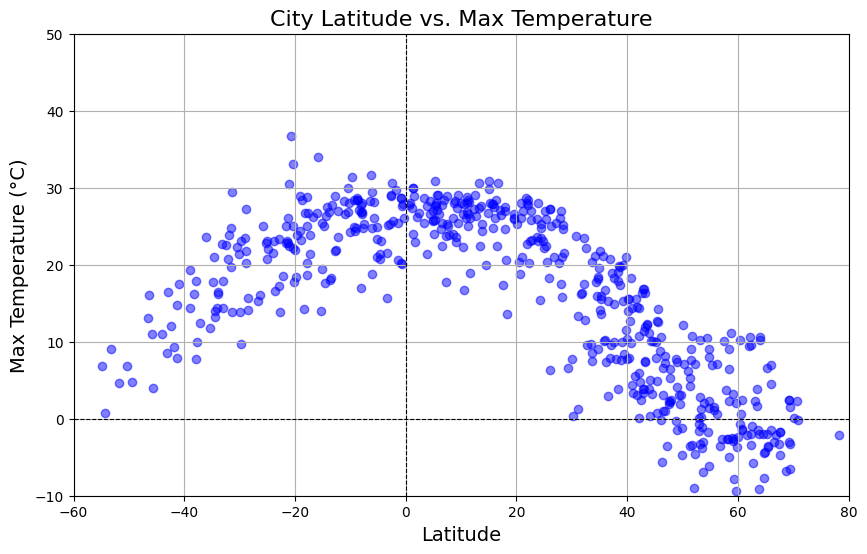

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature', fontsize=16)  # Set title with font size
plt.xlabel('Latitude', fontsize=14)  # Set x-axis label with font size
plt.ylabel('Max Temperature (°C)', fontsize=14)  # Set y-axis label with font size
plt.grid(True)  # Add grid for better readability
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(-10, 50)  # Set y-axis limits (temperature range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

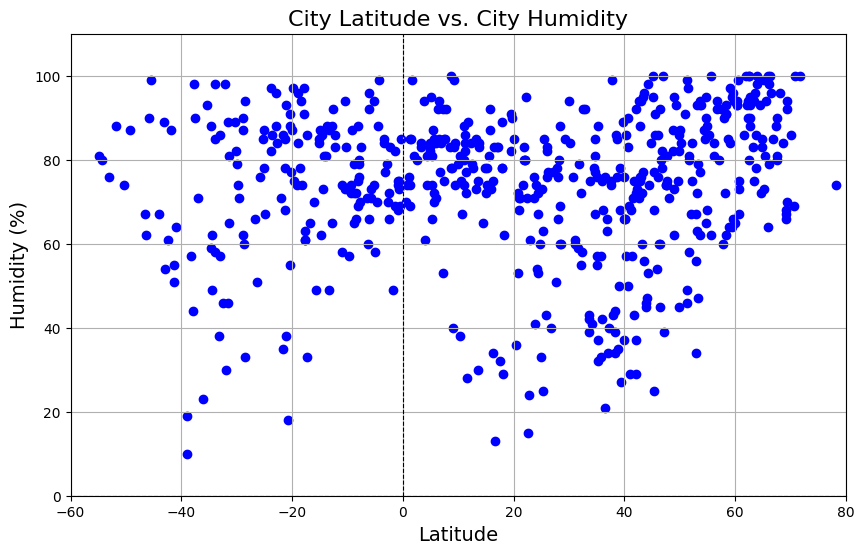

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color='blue')

# Incorporate the other graph propertiesplt.title('City Latitude vs. City Humidity', fontsize=16)  # Set title with font size
plt.title('City Latitude vs. City Humidity', fontsize=16)  # Set title with font size
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(0, 110)  # Set y-axis limits (humidity range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

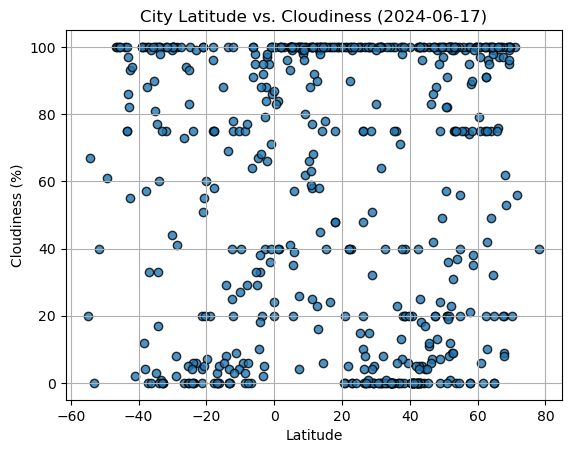

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

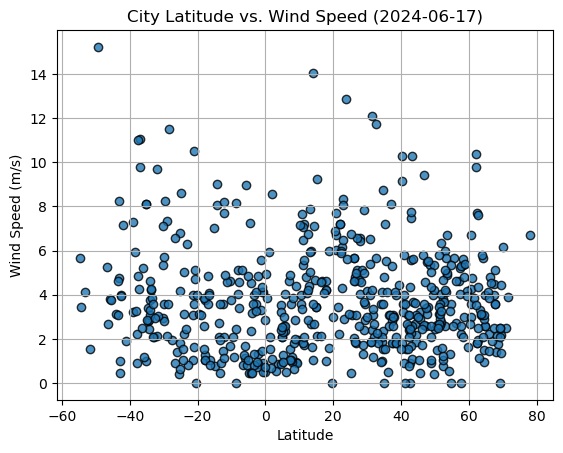

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


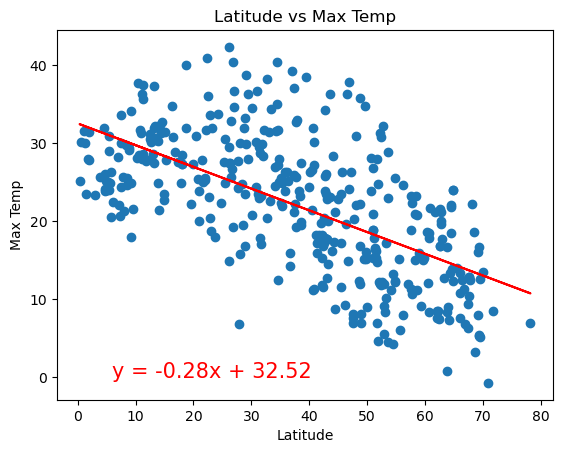

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.6720220238897325


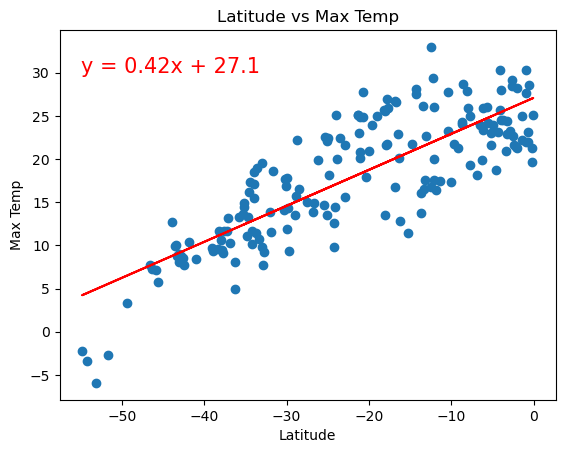

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


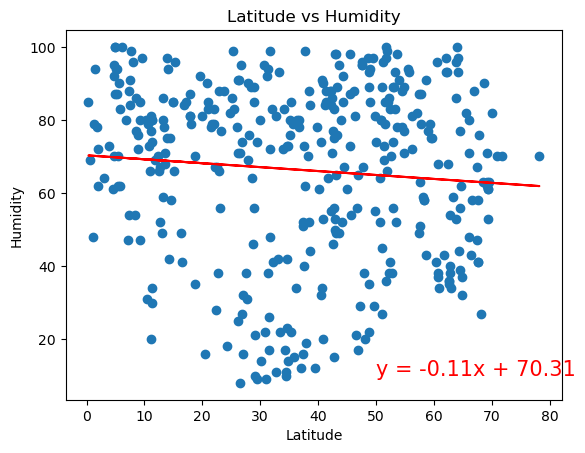

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


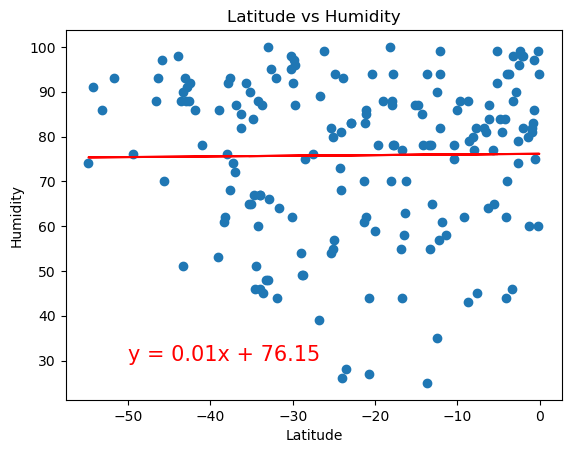

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


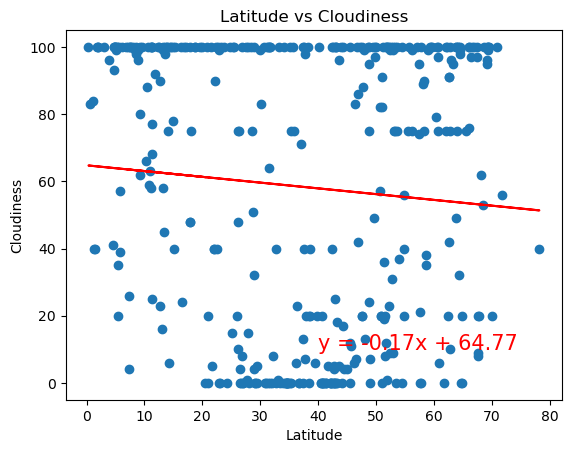

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


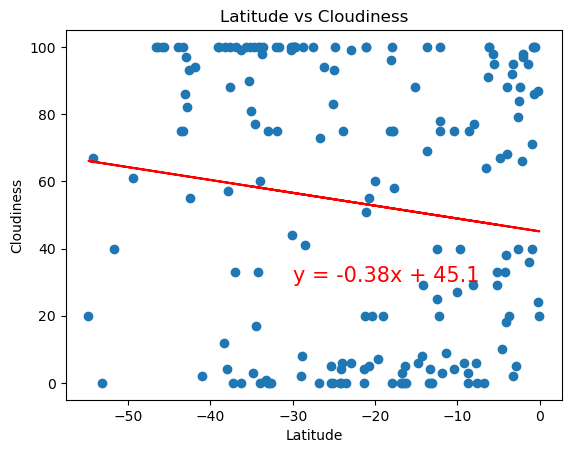

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


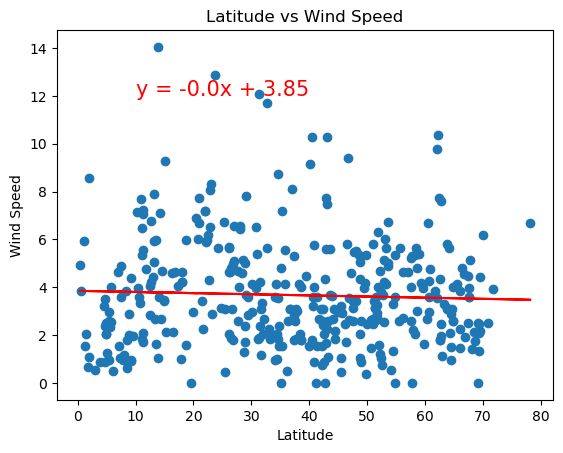

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


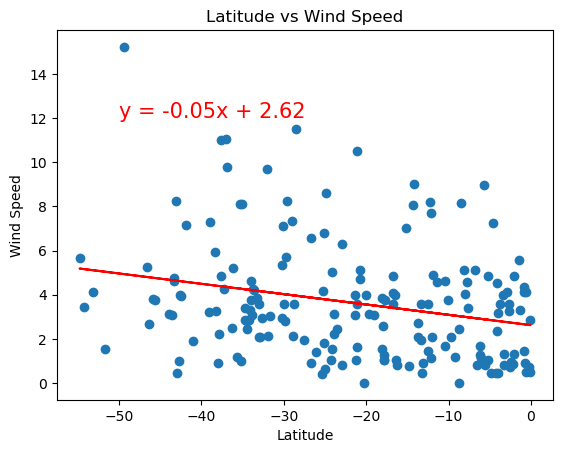

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE